# CH18. 하이퍼 파라미터와 튜닝(2)

## 18.1 결정트리의 하이퍼 파라미터

In [5]:
#-- max_depth : 모델을 학습시키는 트리의 최대 깊이를 나타내는 파라미터
#-- max_depth값을 설정하지 않으면,,  지도 데이터를 모두 분할해 버리게 되므로, 필요이상으로 데이터의 특징을 학습해 버림

#-- "prunning"

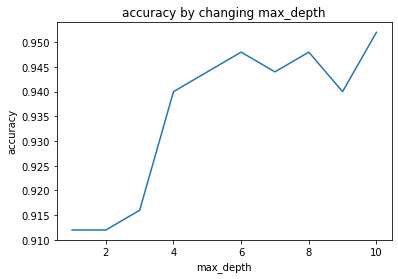

In [12]:
#--
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#--
X, y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# max_depth 값의 범위(1~10)
depth_list = [i for i in range(1, 11)]

# 정확도 저장을 위한 빈 리스트
accuracy = []

# max_depth을 바꾸면서 모델을 학습
for max_depth in depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

#--
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()


In [13]:
#-- random_state

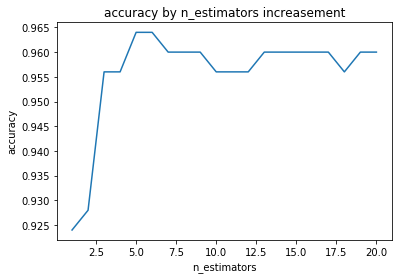

In [14]:
#--
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_estimators 값의 범위(1~20)
n_estimators_list = [i for i in range(1, 21)]

# 정확도를 저장하는 빈 리스트를 만듭니다
accuracy = []

# n_estimators를 바꾸면서 모델을 학습
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    
#
plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()


### 18.2.2 파라미터 max_depth

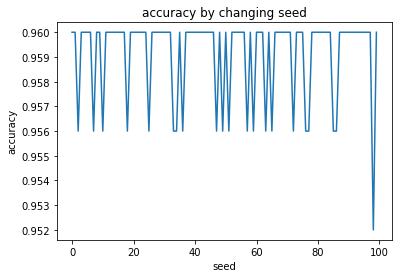

In [18]:
#
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# r_seeds 값의 범위를 지정(0~99)
r_seeds = [i for i in range(100)]
           
# 정확도를 저장하는 빈 리스트를 만듭니다
accuracy = []
           
# random_state을 바꾸면서 모델을 학습
for seed in r_seeds:
    model = RandomForestClassifier(random_state=seed)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    
#
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()

### 18.3 k-NN의 하이퍼 파라미터

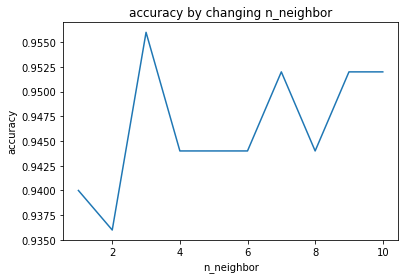

In [19]:
#
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_neighbors 값의 범위을 지정(1~10)
k_list = [i for i in range(1, 11)]

# 정확도를 저장하는 빈 리스트
accuracy = []

# n_neighbors를 바꾸면서 모델을 학습
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    
#
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

### 18.4  튜닝 자동화

In [21]:
#
# (1) 그리드 검색
#

import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# 파라미터 값의 후보를 설정
model_param_set_grid = {SVC(): {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [10 ** i for i in range(-5, 5)],
    "decision_function_shape": ["ovr", "ovo"],
    "random_state": [42]}}

max_score = 0
best_param = None

# 그리드 검색으로 파라미터를 검색
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_

#
print("파라미터: {}".format(best_param))
print("최고 점수", max_score)
svm = SVC()
svm.fit(train_X, train_y)

print()
print("조정없음")
print(svm.score(test_X, test_y))


파라미터: {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
최고 점수 0.9888888888888889

조정없음
0.9866666666666667


In [22]:
#
# (2) 랜덤 검색
#

import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# 파라미터 값의 후보를 설정
model_param_set_random = {SVC(): {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": scipy.stats.uniform(0.00001, 1000),
    "decision_function_shape": ["ovr", "ovo"],
    "random_state": scipy.stats.randint(0, 100)
    }}

max_score = 0
best_param = None

# 랜덤 검색으로 파라미터 검색
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_


print("파라미터: {}".format(best_param))
print("최고 점수", max_score)
svm = SVC()
svm.fit(train_X, train_y)

print()
print("조정없음")
print(svm.score(test_X, test_y))


파라미터: {'C': 440.260219121759, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'random_state': 3}
최고 점수 0.9888888888888889

조정없음
0.9866666666666667


### 연습 문제

In [23]:
#
import requests
import io
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# 필요 데이터의 전처리를 실시
vote_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
s = requests.get(vote_data_url).content
vote_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
vote_data.columns = ['Class Name',
                     'handicapped-infants',
                     'water-project-cost-sharing',
                     'adoption-of-the-budget-resolution',
                     'physician-fee-freeze',
                     'el-salvador-aid',
                     'religious-groups-in-schools',
                     'anti-satellite-test-ban',
                     'aid-to-nicaraguan-contras',
                     'mx-missile',
                     'immigration',
                     'synfuels-corporation-cutback',
                     'education-spending',
                     'superfund-right-to-sue',
                     'crime',
                     'duty-free-exports',
                     'export-administration-act-south-africa']

label_encode = preprocessing.LabelEncoder()
vote_data_encode = vote_data.apply(lambda x: label_encode.fit_transform(x))
X = vote_data_encode.drop('Class Name', axis=1)
Y = vote_data_encode['Class Name']
train_X, test_X, train_y, test_y = train_test_split(X,Y,random_state=50)


# for 문으로 처리하므로 모델명, 모델의 오브젝트, 파라미터 리스트를 모두 리스트에 넣기
models_name = ["SVM", "결정 트리", "랜덤 포레스트"]
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
params = [{"C": [0.01, 0.1, 1.0, 10, 100],
           "kernel": ["linear", "rbf", "poly", "sigmoid"],
           "random_state": [42]},
          {"max_depth": [i for i in range(1, 10)],
           "random_state": [i for i in range(100)]},
          {"n_estimators": [i for i in range(10, 20)],
           "max_depth": [i for i in range(1, 10)],
           "random_state": [i for i in range(100)]}]

for name, model, param in zip(models_name, models, params):
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    print(name)
    print(clf.score(test_X, test_y))
    print()

SVM
0.944954128440367

결정 트리
0.944954128440367

랜덤 포레스트
0.944954128440367



### 종합 문제

In [30]:
#
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

#--
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

#--
data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

#--
model_param_set_grid = {
    LogisticRegression(): {
        "C": [10 ** i for i in range(-5, 5)],
        "random_state": [42]
    },
    LinearSVC(): {
        "C": [10 ** i for i in range(-5, 5)],
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": [42]
    },
    SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [10 ** i for i in range(-5, 5)],
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": [42]
    },
    DecisionTreeClassifier(): {
        "max_depth": [i for i in range(1, 20)],
    },
    RandomForestClassifier(): {
        "n_estimators": [i for i in range(10, 20)],
        "max_depth": [i for i in range(1, 10)],
    },
    KNeighborsClassifier(): {
        "n_neighbors": [i for i in range(1, 10)]
    }
}

#
model_param_set_random = {
    LogisticRegression(): {
        "C" : scipy.stats.uniform(0.00001, 1000),
        "random_state": scipy.stats.randint(0, 100)
    },
    LinearSVC(): {
        "C" : scipy.stats.uniform(0.00001, 1000),
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": scipy.stats.randint(0, 100)        
    },
    SVC(): {
        "kernel" : ["linear", "poly", "rbf", "sigmoid"],
        "C" : scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape" : ["ovr", "ovo"],
        "random_state" : scipy.stats.randint(0, 100)
    },
    DecisionTreeClassifier(): {
        "max_depth" : scipy.stats.randint(1, 20),
    },
    RandomForestClassifier(): {
        "n_estimators" : scipy.stats.randint(10, 100),
        "max_depth" : scipy.stats.randint(1, 20),
    },
    KNeighborsClassifier(): {
        "n_neighbors" : scipy.stats.randint(1, 20)
    }
}

#
max_score = 0
best_model = None
best_param = None


# 그리드 검색
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")

    
    #
    if max_score < score :
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
# 랜덤 검색
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    
    #
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
#--
print("학습 모델 : {}, \n파라미터: {}".format(best_model, best_param))
#
print("최고 점수: ", max_score)

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

학습 모델 : SVC, 
파라미터: {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
최고 점수:  0.9888888888888889
